In [67]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import random
import sys

# Utils
### - Implement

In [68]:
# 주어진 상태(state)에서 가능한 행동(action)들을 반환하는 함수
def get_available_actions(state, grid_reward):
    actions = []  # 가능한 행동들을 저장할 리스트
    rows, cols = grid_reward.shape  # Grid의 크기 (행, 열 크기)
    x, y = state  # 현재 상태의 위치 (행, 열 좌표)

    # 가능한 행동을 확인
    if x > 0:  # 현재 위치가 Grid의 상단이 아니라면 위로 이동 가능
        actions.append("↑")
    if x < rows - 1:  # 현재 위치가 Grid의 하단이 아니라면 아래로 이동 가능
        actions.append("↓")
    if y > 0:  # 현재 위치가 Grid의 좌측 끝이 아니라면 왼쪽으로 이동 가능
        actions.append("←")
    if y < cols - 1:  # 현재 위치가 Grid의 우측 끝이 아니라면 오른쪽으로 이동 가능
        actions.append("→")
    
    return actions  # 가능한 행동 리스트 반환


# 현재 상태(state)와 행동(action)을 기반으로 다음 상태와 보상을 계산하는 함수
def get_transition(state, action, grid_reward):
    x, y = state  # 현재 상태의 위치 (행, 열 좌표)
    rows, cols = grid_reward.shape  # Grid의 크기 (행, 열 크기)

    # 행동(action)에 따라 다음 상태(next state) 계산
    if action == "↑" and x > 0:  # 위로 이동하려고 하며, 상단 경계를 넘지 않을 경우
        next_state = (x - 1, y)
    elif action == "↓" and x < rows - 1:  # 아래로 이동하려고 하며, 하단 경계를 넘지 않을 경우
        next_state = (x + 1, y)
    elif action == "←" and y > 0:  # 왼쪽으로 이동하려고 하며, 좌측 경계를 넘지 않을 경우
        next_state = (x, y - 1)
    elif action == "→" and y < cols - 1:  # 오른쪽으로 이동하려고 하며, 우측 경계를 넘지 않을 경우
        next_state = (x, y + 1)
    else:
        next_state = state  # 만약 경계를 넘어가는 행동이면 현재 상태 유지

    # 다음 상태에서의 보상(reward) 확인
    reward = grid_reward[next_state]  # Grid 상에서 다음 상태에 해당하는 보상 값

    return next_state, reward  # 다음 상태와 보상 반환

#completet


# Utils
### - Given

In [69]:
# Grid World 생성 함수
def generate_grid_world(obstacles):
    # Grid 크기 설정 (7x7)
    grid_size = 7
    # 기본 보상 값 -1로 초기화된 Grid 생성
    grid_reward = np.full((grid_size, grid_size), -1)

    # 장애물 위치에 -100 보상을 설정
    for (x, y) in obstacles:
        grid_reward[x, y] = -100

    # 시작 위치와 목표 위치 설정
    start = (0, 0)  # 시작 위치 (맨 왼쪽 위)
    end = (6, 6)    # 목표 위치 (맨 오른쪽 아래)
    grid_reward[end[0], end[1]] = 0  # 목표 위치의 보상 값은 0

    return grid_reward, start, end


# 정책을 표 형식으로 출력하는 함수
def print_policy(policy):
    # Grid 크기 가져오기
    grid_size = policy.shape[0]
    # 정책의 기호(Symbol)를 저장할 배열 생성
    policy_symbols = np.full((grid_size, grid_size), ' ')
    
    # 각 위치의 정책을 기호로 변환
    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) == (end[0], end[1]):  # 목표 위치
                policy_symbols[x, y] = 'G'  # Goal
            else:
                # 정책 숫자를 기호로 변환 (ACTION_SYMBOLS 사용)
                policy_symbols[x, y] = ACTION_SYMBOLS.get(policy[x, y], ' ')

    # 정책 배열을 행 단위로 출력
    for row in policy_symbols:
        print(' '.join(row))


# 데이터를 시각화하는 함수 (보상 값 등을 표시)
def visualize_map(data, title):
    # 데이터를 색상으로 시각화 (회색조)
    plt.imshow(data, cmap='gray', interpolation='nearest')
    # 컬러바 추가 (값 범위 표시)
    plt.colorbar(label='Value')
    
    # 각 셀에 값을 텍스트로 추가
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            plt.text(j, i, f"{data[i, j]:.1f}", ha="center", va="center", color="Green")
    
    # 제목 및 축 레이블 설정
    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


# 정책을 시각화하는 함수
def visualize_policy(policy, start, end, title, israndom):
    grid_size = 7  # Grid 크기
    policy_symbols = np.full((grid_size, grid_size), ' ', dtype="U10")  # 표시용 배열

    for x in range(grid_size):
        for y in range(grid_size):
            if (x, y) == end:  # 목표 지점
                policy_symbols[x, y] = 'G'
            elif (x, y) == start:  # 시작 지점
                policy_symbols[x, y] = 'S'
            elif policy[(x, y)]:
                if isinstance(policy[(x, y)], list):  # 리스트 형태 정책 처리
                    if israndom:
                        policy_symbols[x, y] = random.choice(policy[(x, y)])  # 랜덤으로 하나 선택
                    else:
                        policy_symbols[x, y] = ' '.join(policy[(x, y)])  # 모든 행동 표시
                else:  # 단일 행동 처리
                    policy_symbols[x, y] = policy[(x, y)]

    # 시각화
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim(0, grid_size)
    ax.set_ylim(0, grid_size)
    ax.set_xticks(np.arange(0, grid_size + 1, 1))
    ax.set_yticks(np.arange(0, grid_size + 1, 1))
    ax.set_yticklabels(np.arange(grid_size, -1, -1))  # Y축 역순 설정
    ax.grid(True)

    for x in range(grid_size):
        for y in range(grid_size):
            # 텍스트로 기호 표시
            ax.text(y + 0.5, grid_size - x - 0.5, policy_symbols[x, y], ha='center', va='center', fontsize=10)
            if grid_reward[x, y] == -100:  # 장애물
                rect = plt.Rectangle((y, grid_size - x - 1), 1, 1, facecolor='black')
                ax.add_patch(rect)
            elif (x, y) == end:  # 목표 지점
                rect = plt.Rectangle((y, grid_size - x - 1), 1, 1, facecolor='green', alpha=0.3)
                ax.add_patch(rect)
            elif (x, y) == start:  # 시작 지점
                rect = plt.Rectangle((y, grid_size - x - 1), 1, 1, facecolor='blue', alpha=0.3)
                ax.add_patch(rect)

    plt.title(title)
    plt.show()

    

In [70]:
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3
ACTIONS = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]
ACTION_SYMBOLS = {ACTION_UP: '↑', ACTION_DOWN: '↓', ACTION_LEFT: '←', ACTION_RIGHT: '→'}

border = f"\n{'='*60}\n"
obstacles = [(0, 2), (1, 2), (3, 4), (3, 5), (6, 2), (6, 3)]
grid_reward, start, end = generate_grid_world(obstacles)

# Policy initialization
### - Implement

In [71]:
def policy_generator(grid_reward, israndom, isall=False):

    rows, cols = grid_reward.shape  # Grid의 크기 (행, 열 크기)
    policy = {}  # 상태(state)를 키로 하고, 행동(action)을 값으로 저장하는 딕셔너리

    # 모든 상태에 대해 정책 생성
    for x in range(rows):
        for y in range(cols):
            state = (x, y)  # 현재 상태

            # 보상 값이 특정 조건일 경우, 정책을 생성하지 않음 (예: 목표 지점)
            if grid_reward[state] == 0:  # 목표 지점에서는 행동 필요 없음
                policy[state] = []
                continue

            # 가능한 행동 리스트를 동적으로 계산
            available_actions = get_available_actions(state, grid_reward)

            # 무작위 정책 생성
            if israndom:
                if isall:  # 가능한 모든 행동을 포함
                    policy[state] = available_actions
                else:  # 무작위로 하나의 행동 선택
                    policy[state] = [random.choice(available_actions)]

            # 기본 정책 생성 (예: 고정 방향 정책)
            else:
                if isall:  # 가능한 모든 행동을 포함
                    policy[state] = available_actions
                else:  # 특정 기본 행동 설정 (예: 항상 오른쪽으로 이동)
                    policy[state] = ["ACTION_RIGHT"] if "ACTION_RIGHT" in available_actions else available_actions[:1]

    return policy


# Policy evaluation
### - Implement

In [72]:

def policy_evaluation(grid_reward, policy, discount_factor=0.9, theta=1e-1, israndom=True):

    grid_size = grid_reward.shape[0]  # Grid 크기
    V = np.zeros((grid_size, grid_size))  # 초기 가치 함수 V(s)
    
    # 장애물에 대해서는 -100으로 초기화
    for x in range(grid_size):
        for y in range(grid_size):
            state = (x, y)
            if grid_reward[state] == -100:  # 장애물은 -100으로 고정
                V[state] = -100

    while True:
        delta = 0  # 가치 함수 변화량 초기화
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)
                
                # 장애물인 경우는 건너뛰기
                if grid_reward[state] == -100:
                    continue
                
                # 현재 상태의 가치 함수 계산
                v = V[state]  # 기존 가치 함수 저장
                new_v = 0     # 새로운 가치 함수 초기화

                # 정책이 랜덤한 경우 모든 가능한 행동의 평균 계산
                if israndom and policy.get(state):
                    for action in policy[state]:
                        next_state, reward = get_transition(state, action, grid_reward)
                        new_v += (1 / len(policy[state])) * (reward + discount_factor * V[next_state])
                
                # 정책이 단일 행동인 경우 결정론적으로 계산
                elif not israndom and policy.get(state):
                    action = policy[state][0]  # 단일 행동 가져오기
                    next_state, reward = get_transition(state, action, grid_reward)
                    new_v = reward + discount_factor * V[next_state]

                # 새로운 가치 함수가 0일 때 특정 조건을 설정
                if new_v == 0:
                    if x != grid_size - 1 or y != grid_size - 1:
                        new_v = -1

                # 가치 함수 갱신
                V[state] = new_v
                delta = max(delta, abs(v - V[state]))  # 최대 변화량 업데이트
            
            yield V   
            
        # 수렴 조건 확인
        if delta < theta:
            break



    return V  # 최종 가치 함수 반환


# Policy improvement
### -Implement

In [73]:
def policy_improvement(grid_reward, V, discount_factor=0.9):
    grid_size = grid_reward.shape[0]
    new_policy = {}

    actions = ["↑", "↓", "←", "→"]

    for x in range(grid_size):
        for y in range(grid_size):
            state = (x, y)

            if grid_reward[state] == 0 or grid_reward[state] == -100:
                new_policy[state] = []
                continue

            best_action = None
            max_value = float('-inf')

            for action in actions:
                next_state, reward = get_transition(state, action, grid_reward)
                value = reward + discount_factor * V[next_state]  # 다음 상태의 가치값 접근
                if value > max_value:
                    max_value = value
                    best_action = action

            new_policy[state] = [best_action]

    return new_policy


# Policy iteration
### - Implement

In [ ]:
def policy_iteration(grid_reward, max_iterations=100, discount_factor=0.9, theta=1e-1):
    # 초기 정책 생성 (무작위 정책)
    policy = policy_generator(grid_reward, israndom=True)
    stable = False  # 정책이 안정될 때까지 반복
    iteration = 0
    grid_size = grid_reward.shape[0]  # Grid 크기

    visualization_count = 0  # 현재 출력한 횟수

    # 가치 함수 초기화
    V = np.zeros((grid_size, grid_size))

    while not stable and iteration < max_iterations:
        iteration += 1

        # 정책 평가 단계

        V_generator = policy_evaluation(grid_reward, policy, discount_factor, theta)

        # 정책 평가에서 출력 제한 적용
        for V in V_generator:
            # 지정된 최대 출력 횟수(max_visualizations) 또는 96~100번째 반복에서만 출력
            if (visualization_count < 5) or (96 <= visualization_count <= 100):
                print(f"\n=== Iteration {visualization_count}: Policy Improvement ===")
                visualize_map(V, f"Value map after iteration {visualization_count} during Policy Evaluation")
                visualize_policy(policy, start=None, end=None, title=f"Policy after iteration {visualization_count} during Policy Evaluation", israndom=True)
                visualization_count += 1
            pass

        # 정책 개선 단계

        stable = True
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)

                # 장애물과 목표 지점에서는 정책 변경하지 않음
                if grid_reward[state] == 0 or grid_reward[state] == -100:
                    continue

                old_action = policy[state]
                best_action = None
                max_value = -float('inf')

                for action in get_available_actions(state, grid_reward):
                    next_state, reward = get_transition(state, action, grid_reward)
                    value = reward + discount_factor * V[next_state]

                    if value > max_value:
                        max_value = value
                        best_action = action

                if old_action != best_action:
                    stable = False

                # 정책 업데이트
                policy[state] = [best_action]

        # 정책 개선 출력 제한 적용
        if (visualization_count < 5) or (10 <= iteration <= 15):
            print(f"\n=== Iteration {iteration}: Policy Improvement ===")   
            visualize_policy(policy, start=None, end=None, title=f"Policy after iteration {iteration}", israndom=True)
            visualize_map(V, f"Value map after iteration {iteration} during Policy Improvement")
            visualization_count += 1

    return policy, V


# Value iteration
### - Implement

In [75]:
def value_iteration(grid_reward, discount_factor=0.9, theta=1e-1):

    grid_size = grid_reward.shape[0]
    V = np.zeros((grid_size, grid_size))  # 가치 함수 초기화
    policy = np.full((grid_size, grid_size), "", dtype=object)  # 최적 정책 (문자)
    iteration = 0  # 반복 횟수 기록

    actions = ["↑", "↓", "←", "→"]  # 행동 방향

    # 장애물의 초기 가치를 -100으로 설정
    for x in range(grid_size):
        for y in range(grid_size):
            if grid_reward[x, y] == -100:  # 장애물일 경우
                V[x, y] = -100

    while True:
        delta = 0  # 가치 함수 변화량 초기화

        # 각 상태에 대해 가치 함수 갱신
        for x in range(grid_size):
            for y in range(grid_size):
                state = (x, y)

                # 장애물과 목표 지점은 갱신하지 않음
                if grid_reward[state] == -100 or grid_reward[state] == 0:
                    continue

                # 가능한 행동 중 최댓값 찾기
                max_value = float('-inf')
                best_action = None

                for action_idx, action in enumerate(actions):
                    next_state, reward = get_transition(state, action, grid_reward)

                    # 장애물로 이동하는 경우 계산 제외
                    if grid_reward[next_state] == -100:
                        continue

                    value = reward + discount_factor * V[next_state]
                    if value == 0:
                        value = -1
                    if value > max_value:
                        max_value = value
                        best_action = action  # 문자열로 저장

                # 가치 함수 갱신
                delta = max(delta, abs(V[state] - max_value))
                V[state] = max_value
                policy[state] = best_action  # 최적 행동 문자열 저장

        iteration += 1

        # 현재 변화량이 수렴 기준(theta)보다 작으면 종료
        if delta < theta:
            break

        # 중간 결과 반환을 위해 yield 사용
        yield iteration, V, policy

    # 최종 결과 반환
    return V, policy


# Show policy iteration results
### - Given

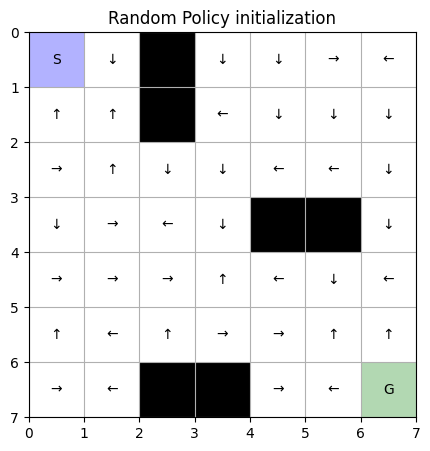


=== Iteration 0: Policy Improvement ===


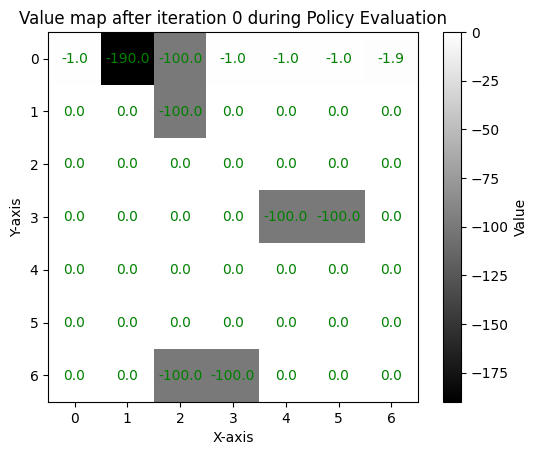

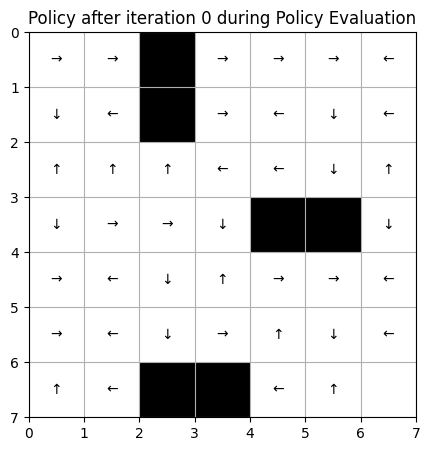


=== Iteration 1: Policy Improvement ===


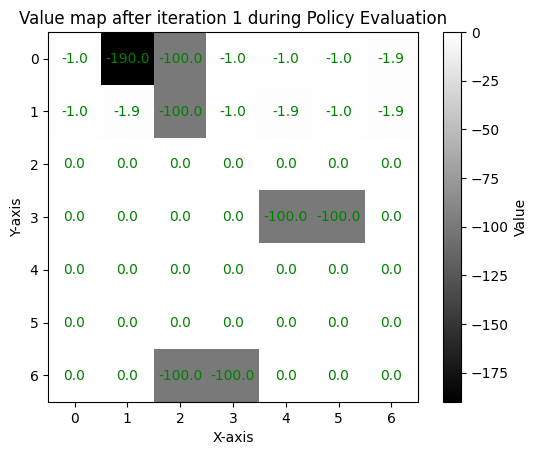

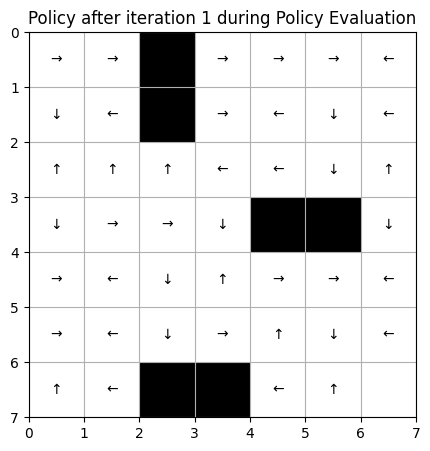


=== Iteration 2: Policy Improvement ===


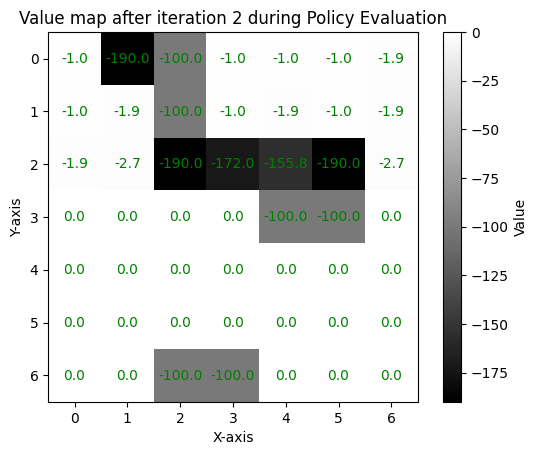

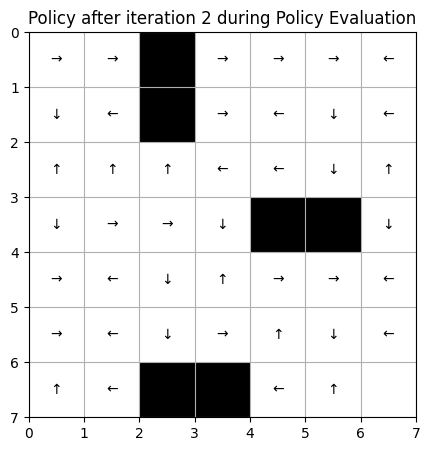


=== Iteration 3: Policy Improvement ===


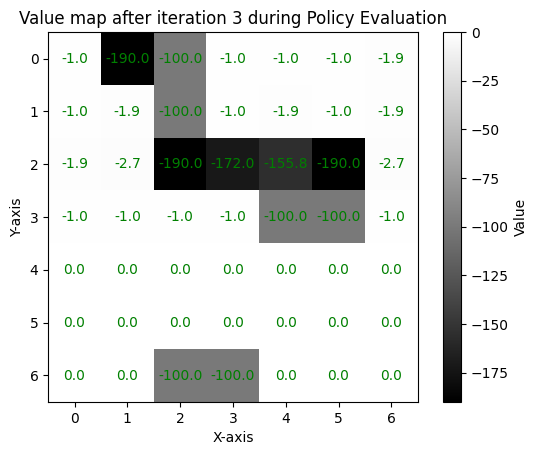

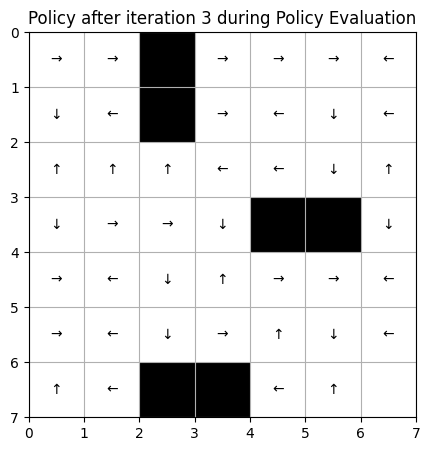


=== Iteration 4: Policy Improvement ===


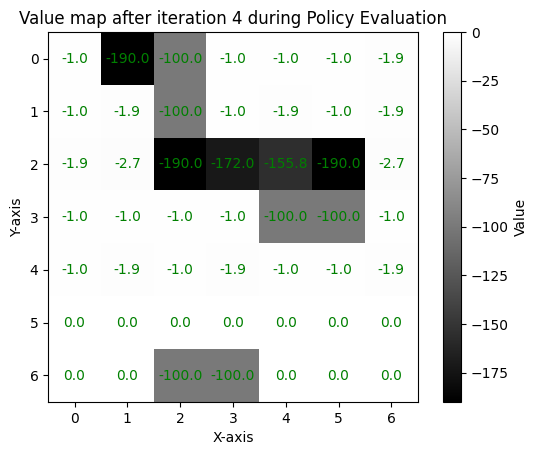

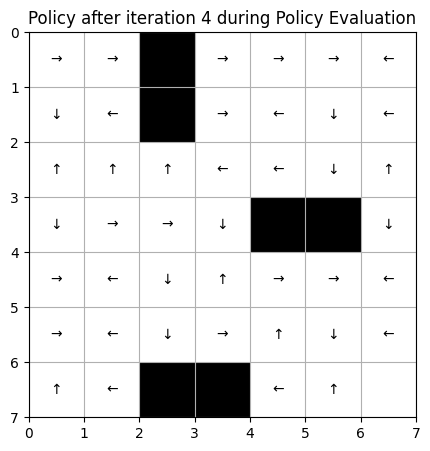


=== Iteration 10: Policy Improvement ===


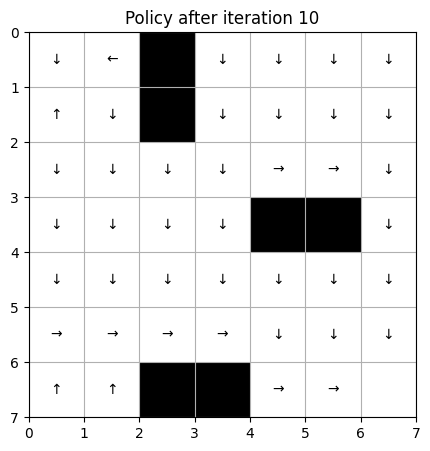

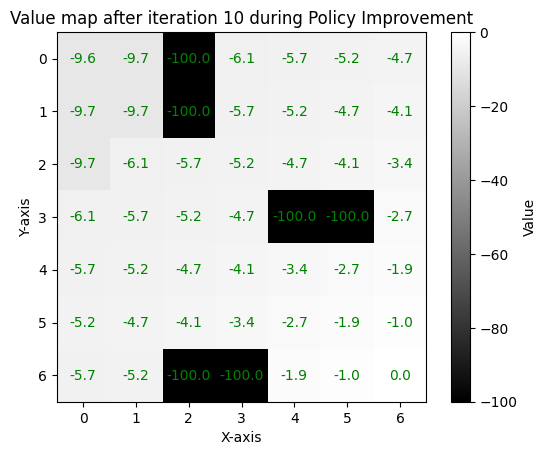


=== Iteration 11: Policy Improvement ===


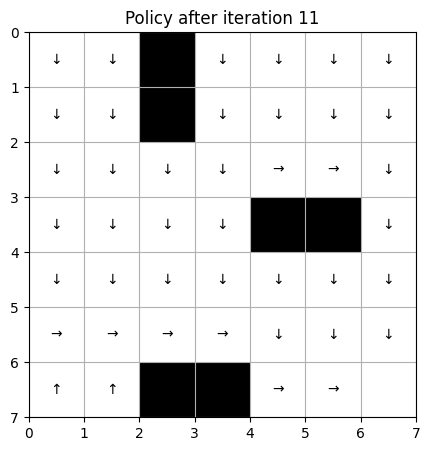

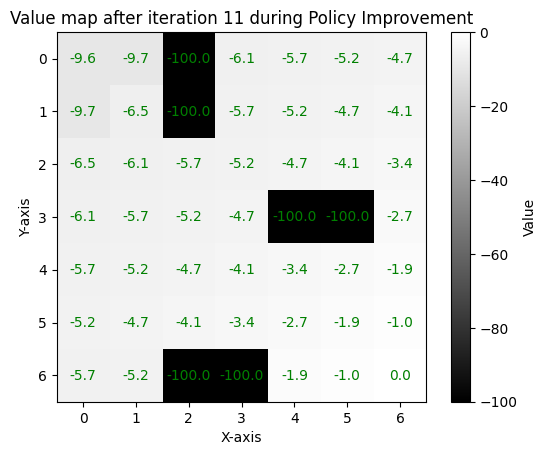


=== Iteration 12: Policy Improvement ===


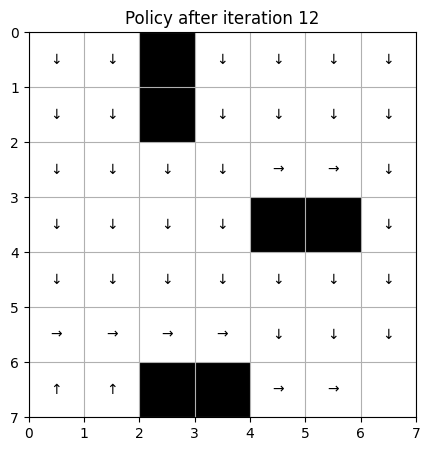

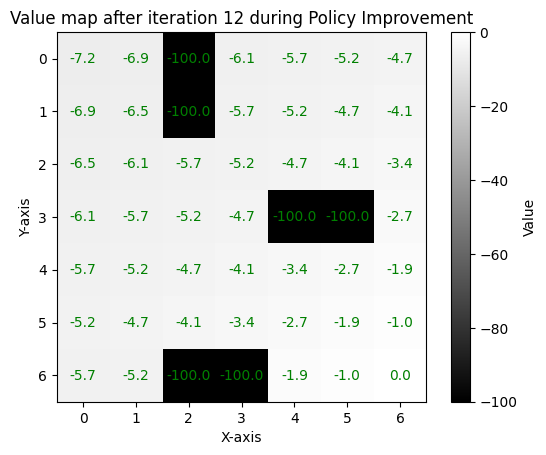


=== Iteration 13: Policy Improvement ===


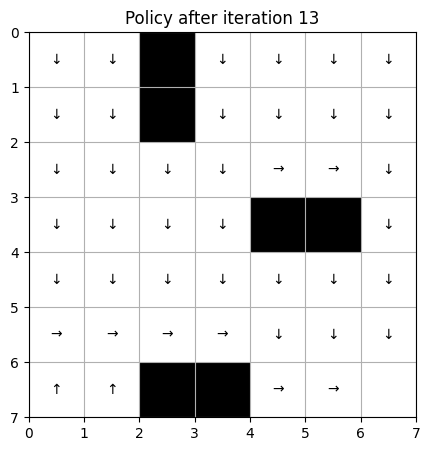

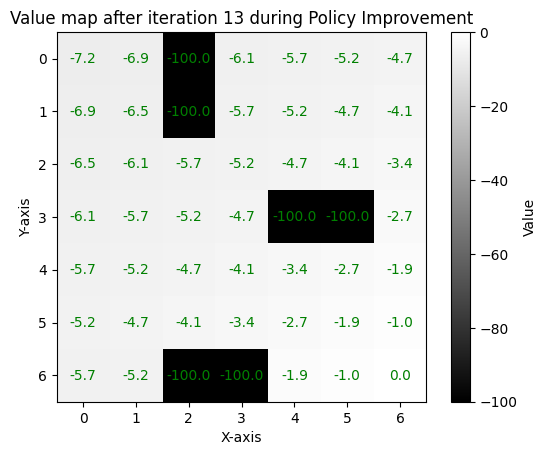


=== Iteration 14: Policy Improvement ===


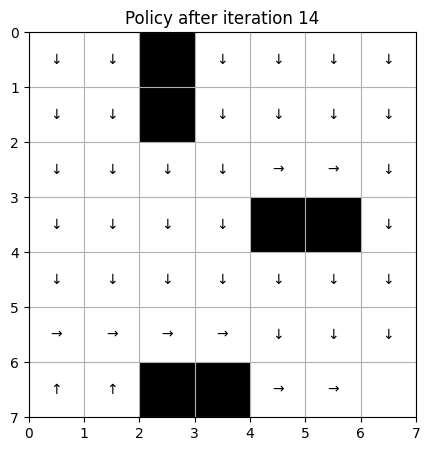

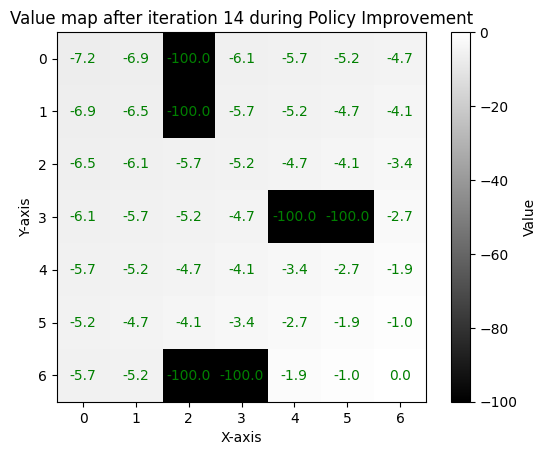


=== Iteration 15: Policy Improvement ===


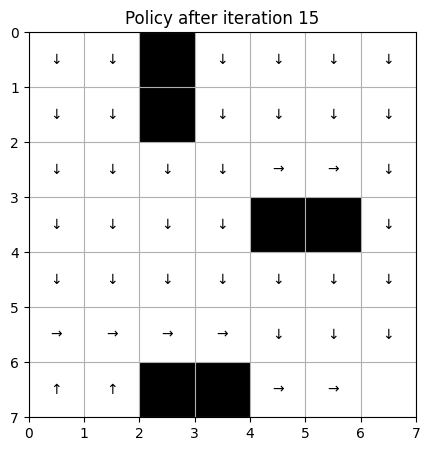

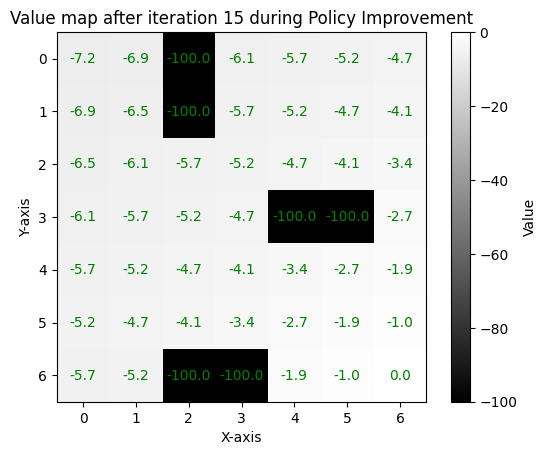


=== Iteration 16: Policy Improvement ===


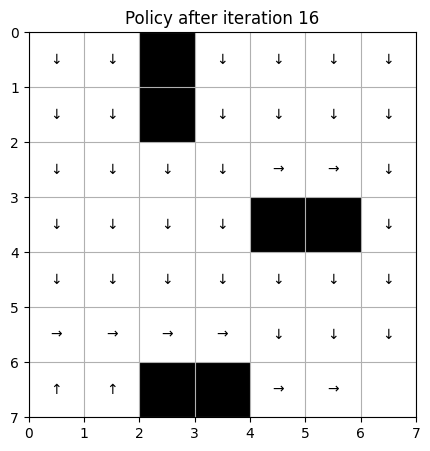

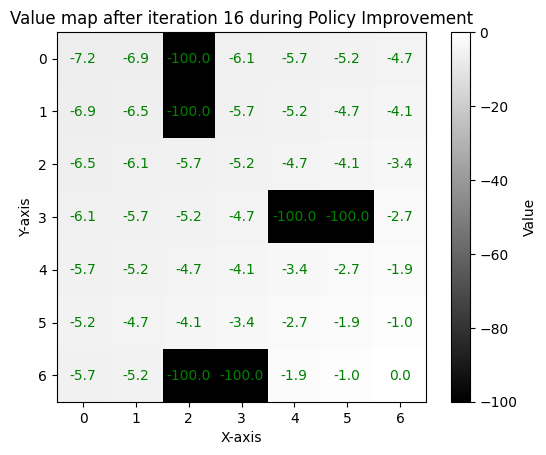


=== Iteration 17: Policy Improvement ===


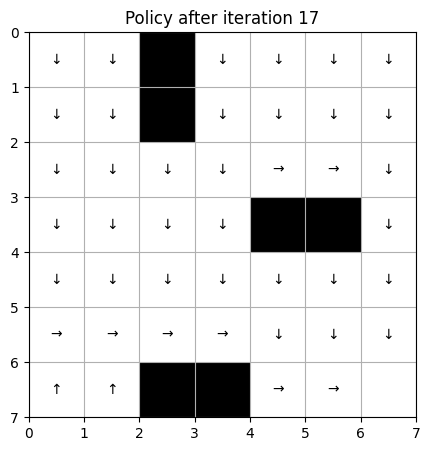

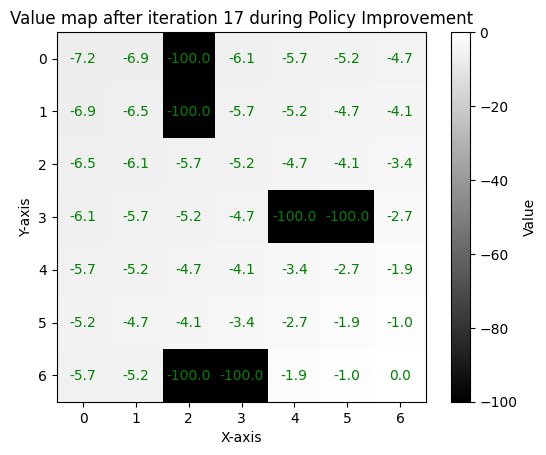


=== Iteration 18: Policy Improvement ===


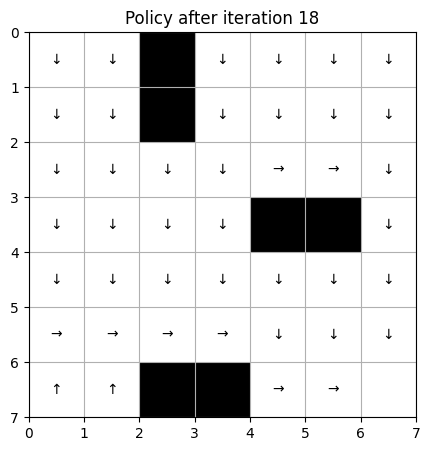

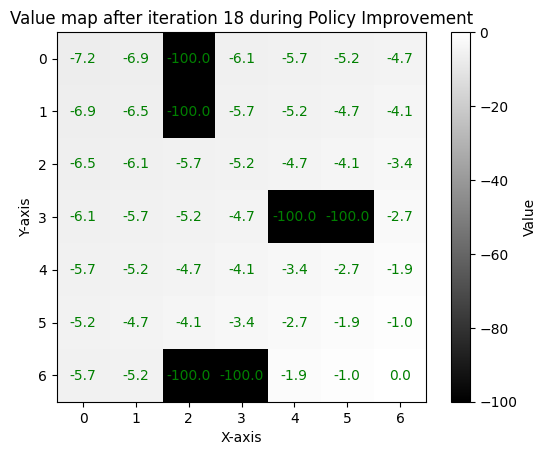


=== Iteration 19: Policy Improvement ===


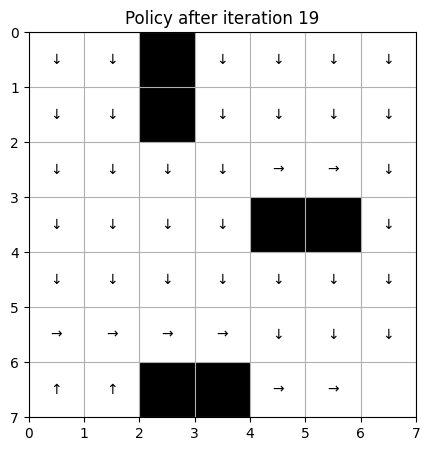

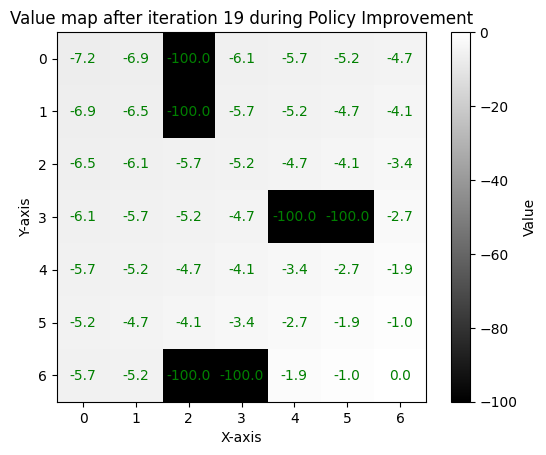


=== Iteration 20: Policy Improvement ===


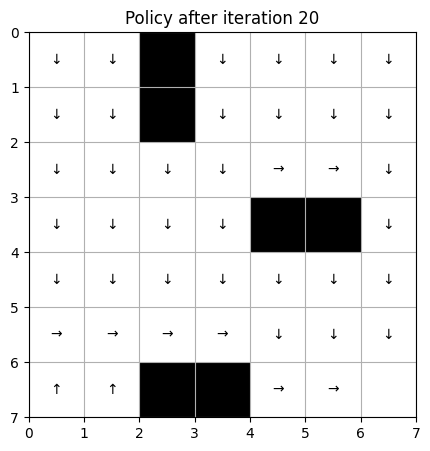

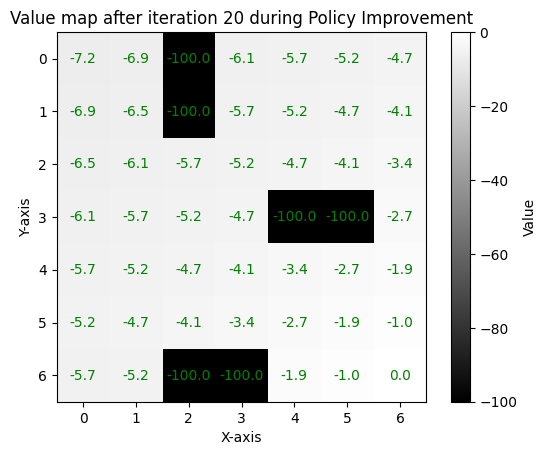


=== Iteration 21: Policy Improvement ===


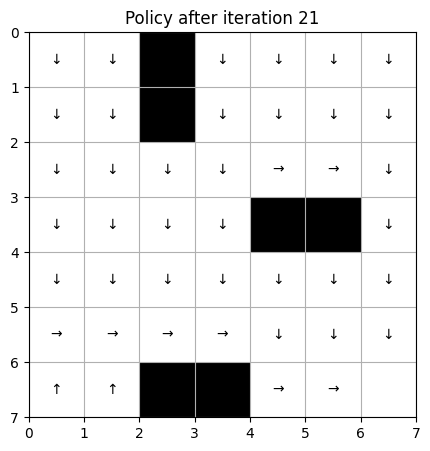

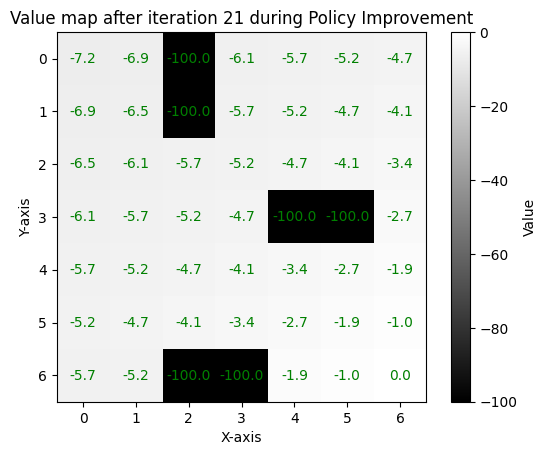


=== Iteration 22: Policy Improvement ===


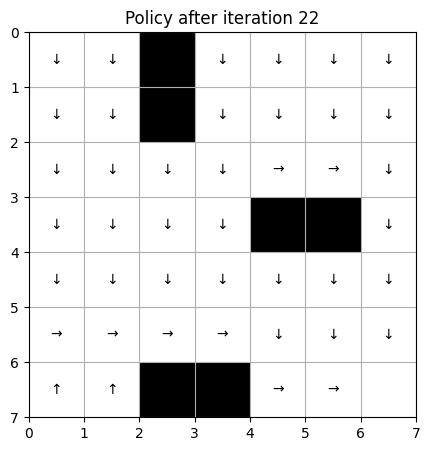

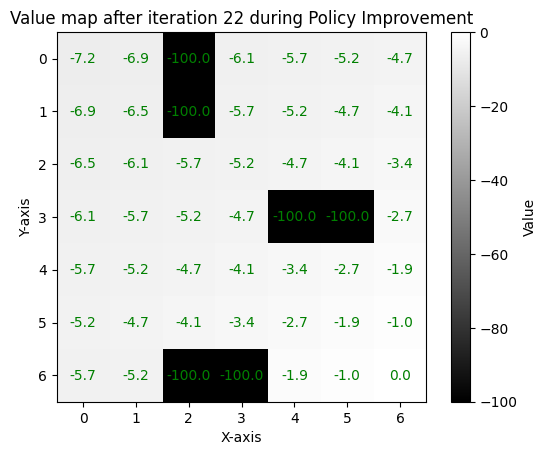


=== Iteration 23: Policy Improvement ===


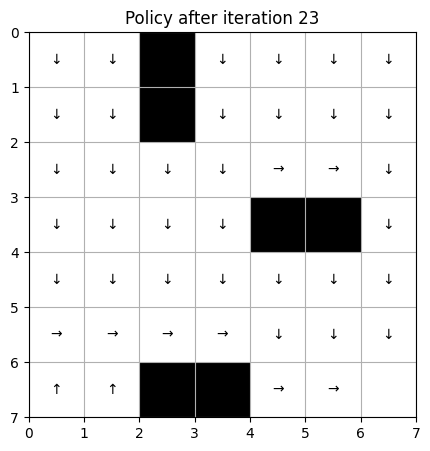

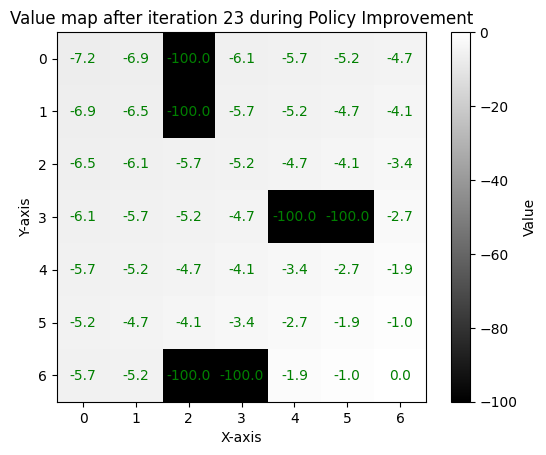


=== Iteration 24: Policy Improvement ===


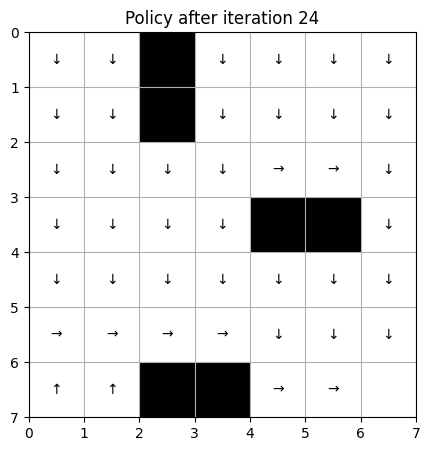

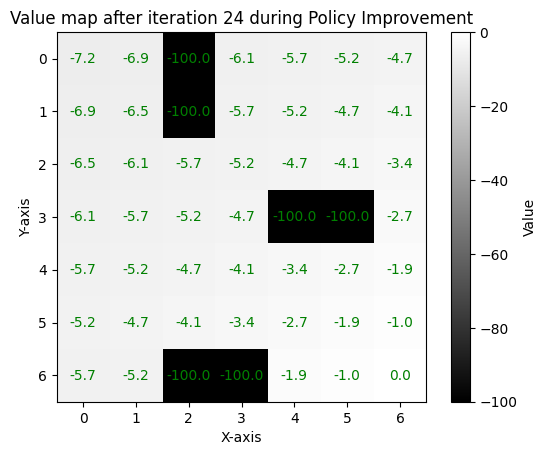


=== Iteration 25: Policy Improvement ===


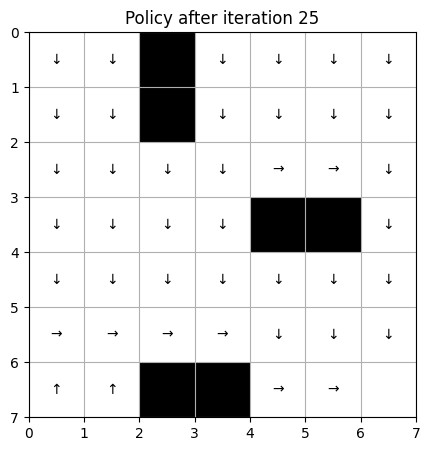

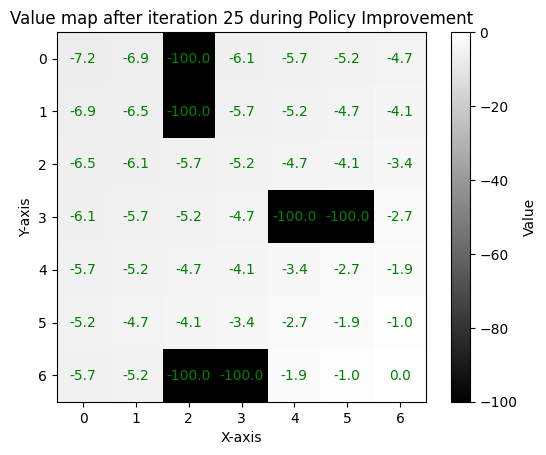


=== Iteration 26: Policy Improvement ===


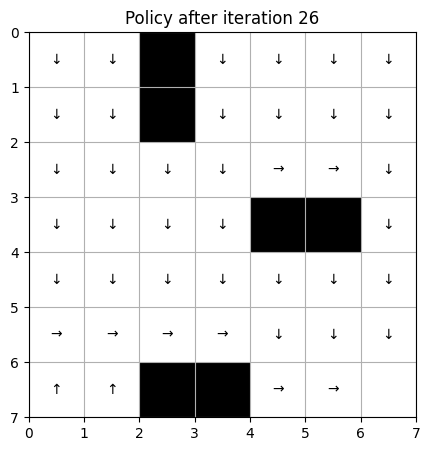

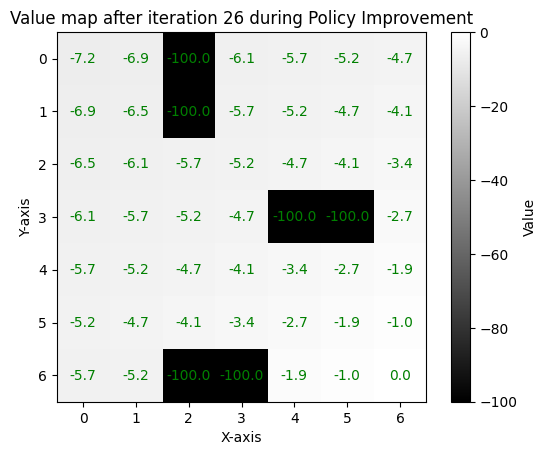


=== Iteration 27: Policy Improvement ===


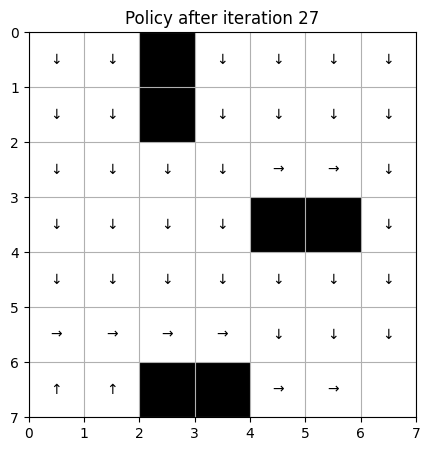

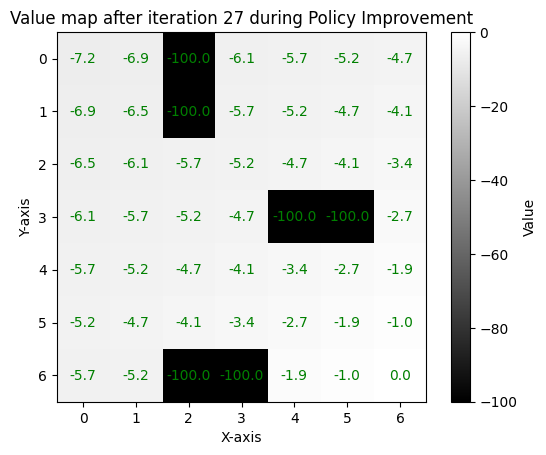


=== Iteration 28: Policy Improvement ===


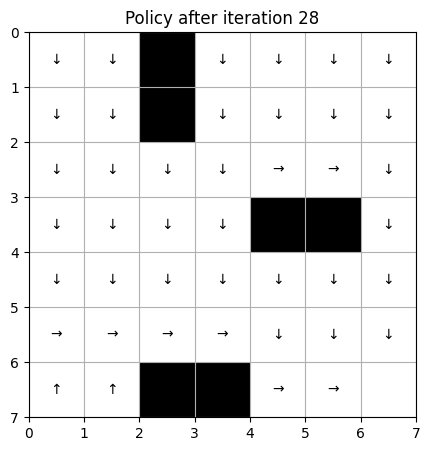

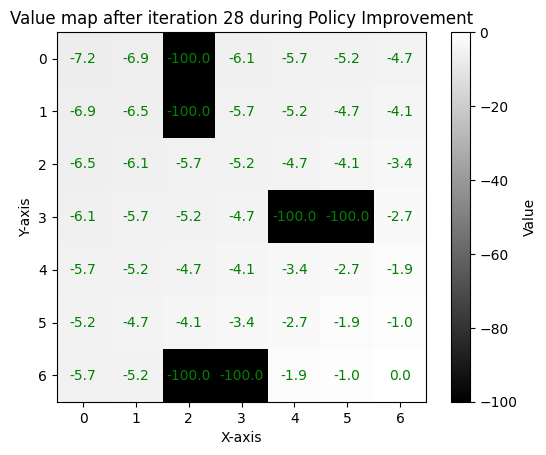


=== Iteration 29: Policy Improvement ===


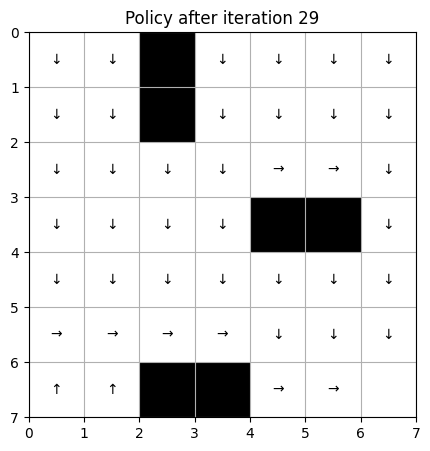

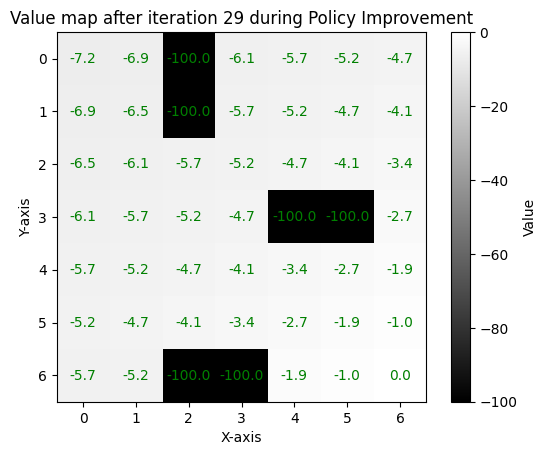


=== Iteration 30: Policy Improvement ===


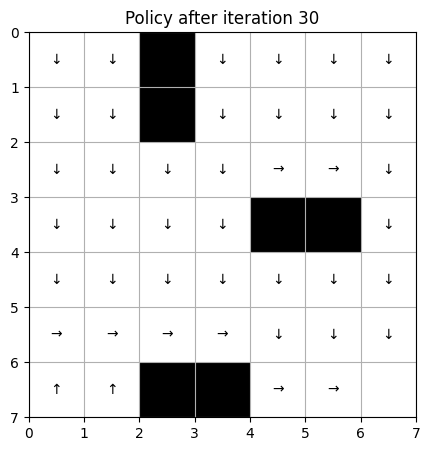

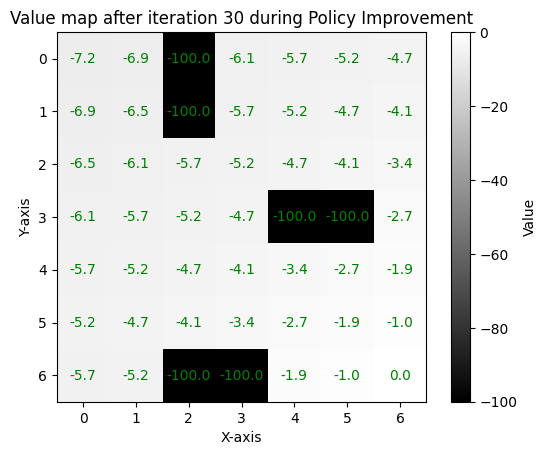


=== Iteration 31: Policy Improvement ===


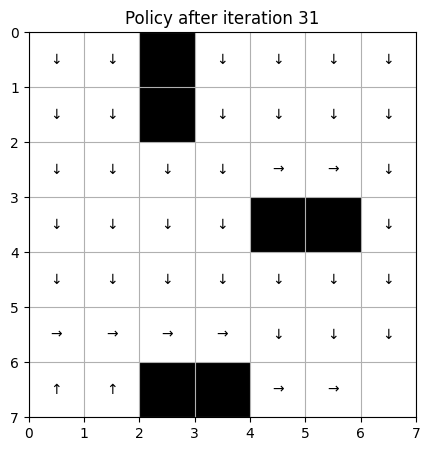

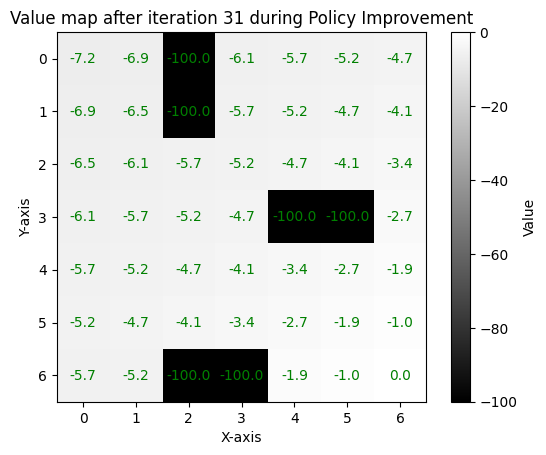


=== Iteration 32: Policy Improvement ===


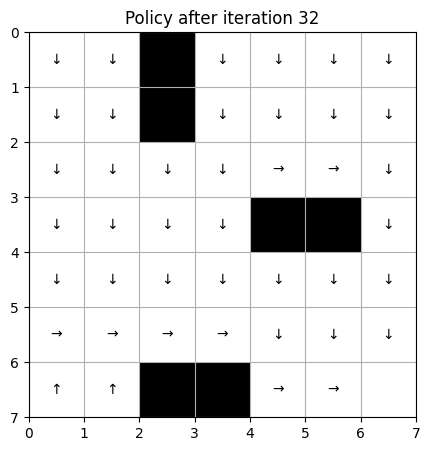

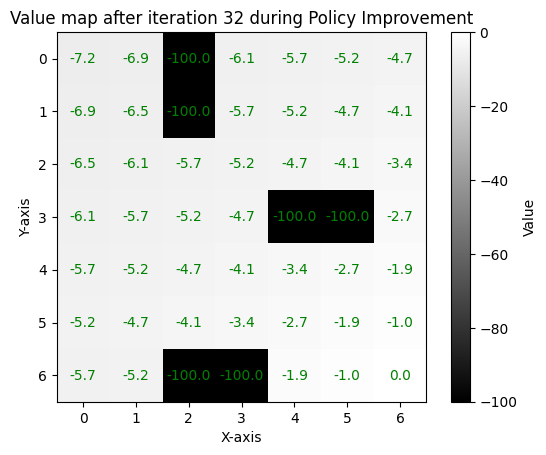


=== Iteration 33: Policy Improvement ===


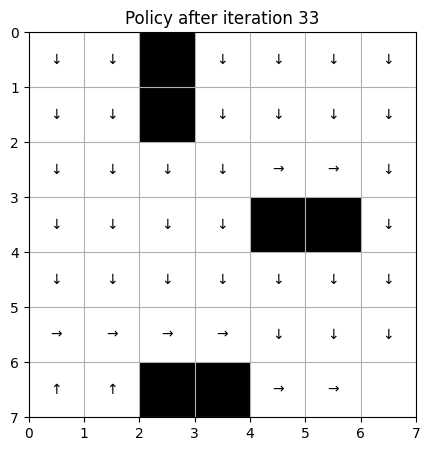

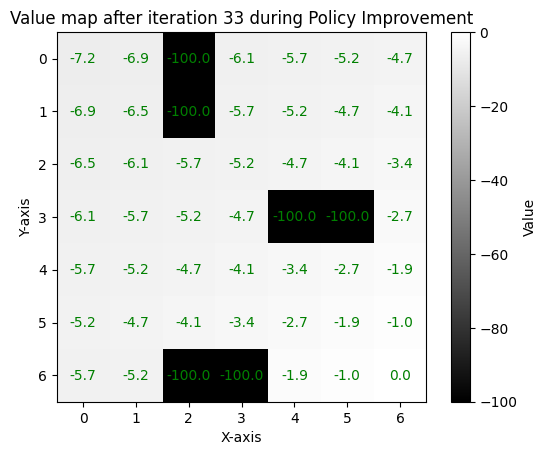


=== Iteration 34: Policy Improvement ===


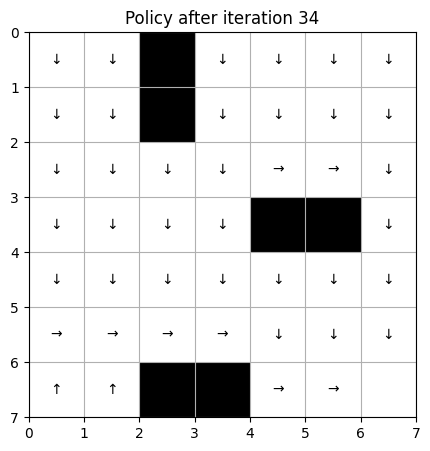

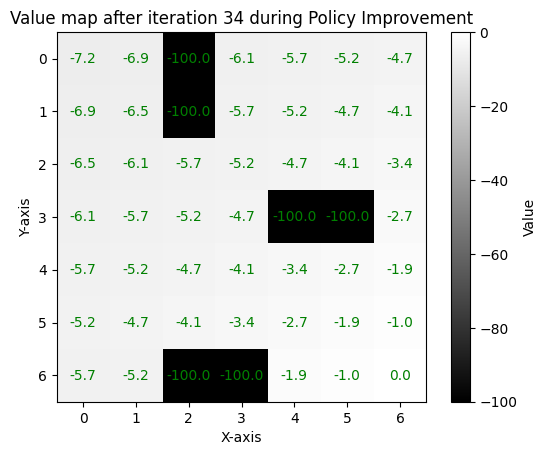


=== Iteration 35: Policy Improvement ===


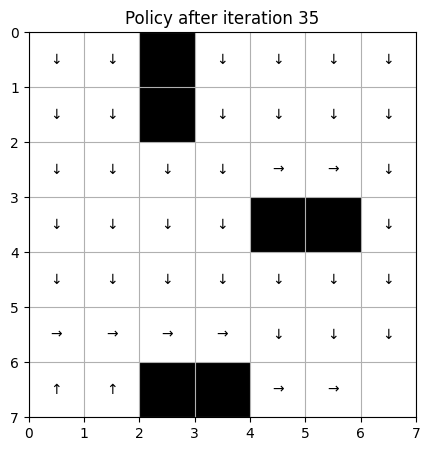

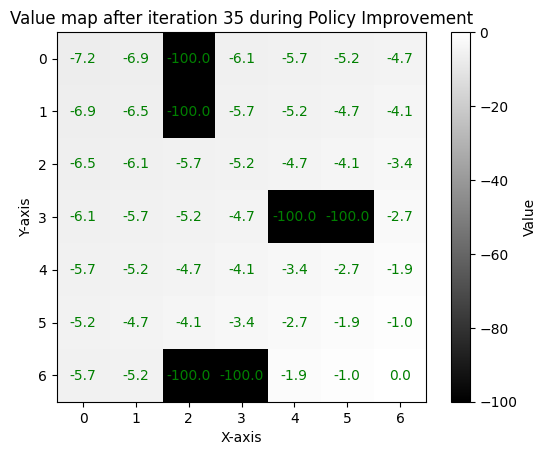


=== Iteration 36: Policy Improvement ===


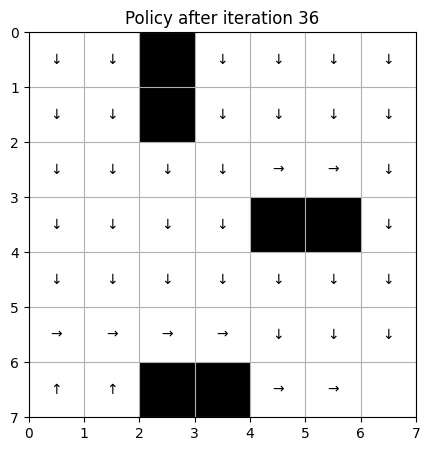

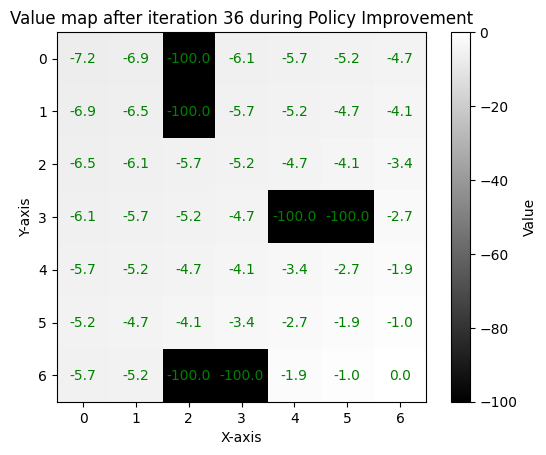


=== Iteration 37: Policy Improvement ===


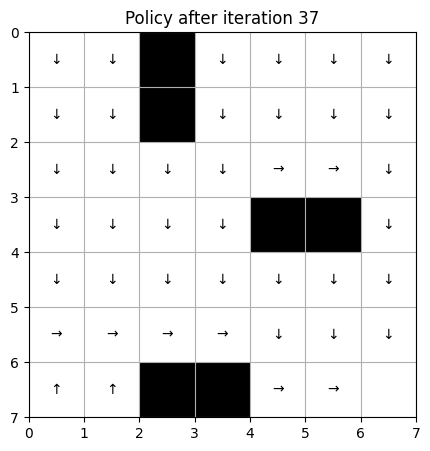

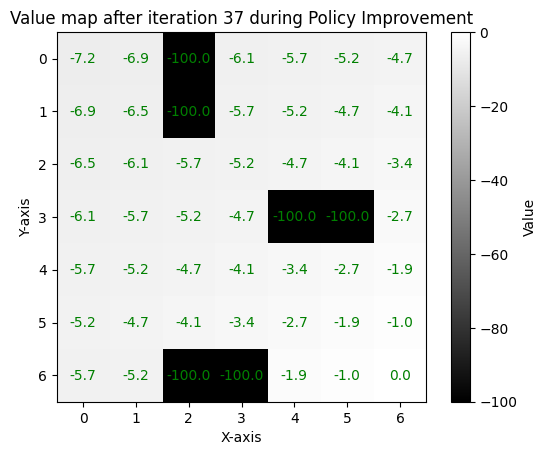


=== Iteration 38: Policy Improvement ===


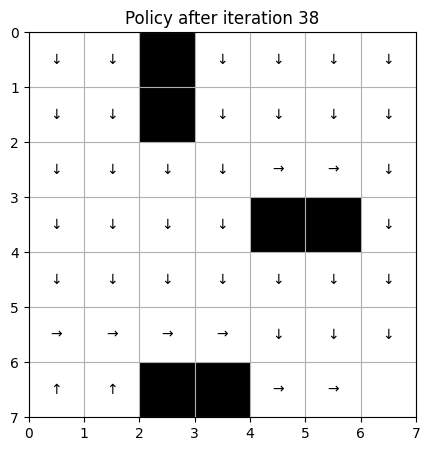

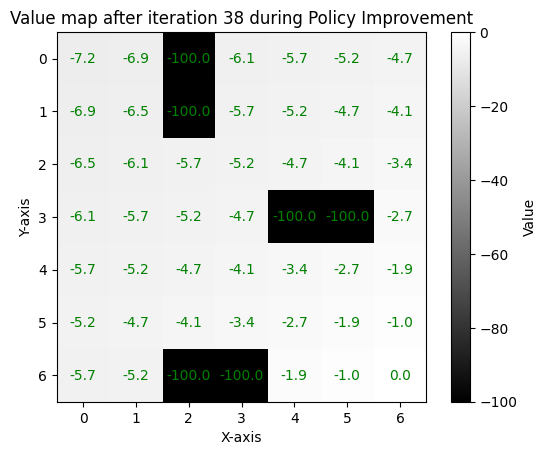


=== Iteration 39: Policy Improvement ===


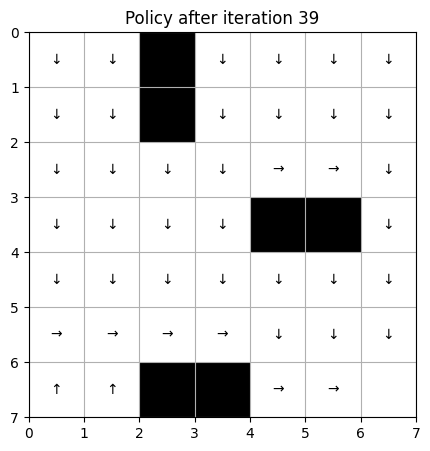

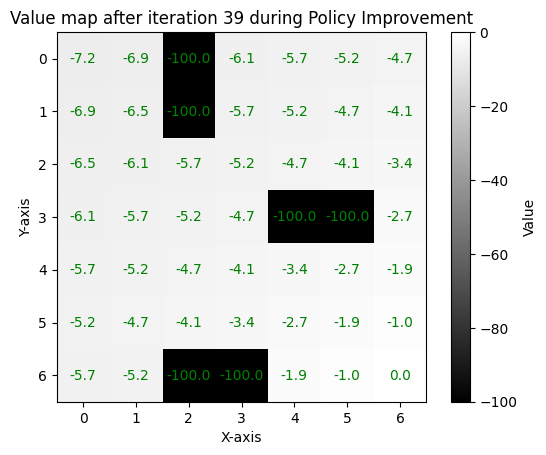


=== Iteration 40: Policy Improvement ===


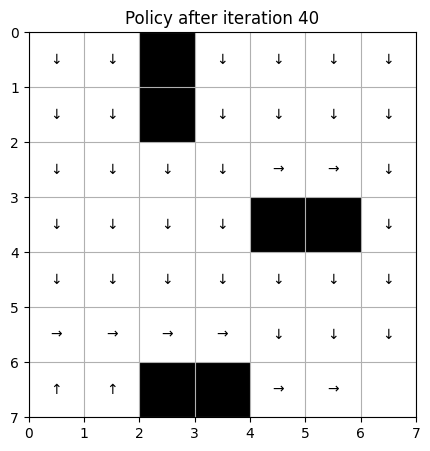

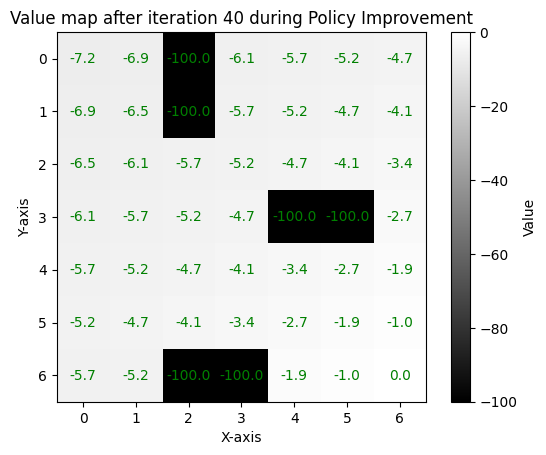

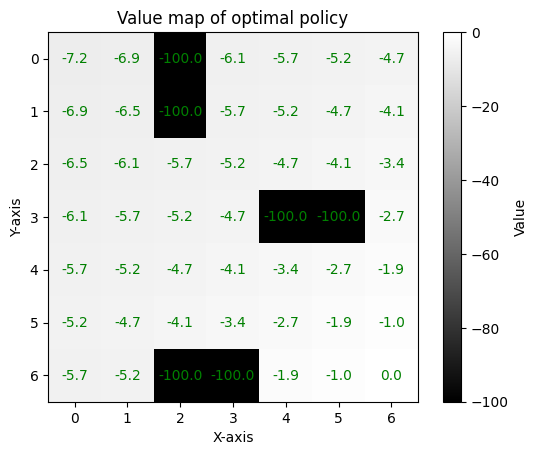

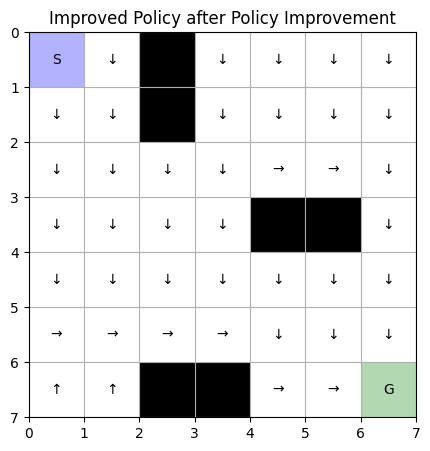

In [76]:
# Policy initialization
random_policy = policy_generator(grid_reward, israndom=True)
visualize_policy(random_policy, start, end, "Random Policy initialization", True)

# Policy iteration
optimal_policy, optimal_value = policy_iteration(grid_reward)
visualize_map(optimal_value, "Value map of optimal policy")
visualize_policy(optimal_policy, start, end, "Improved Policy after Policy Improvement", True)

# Show value iteration results
### - Given

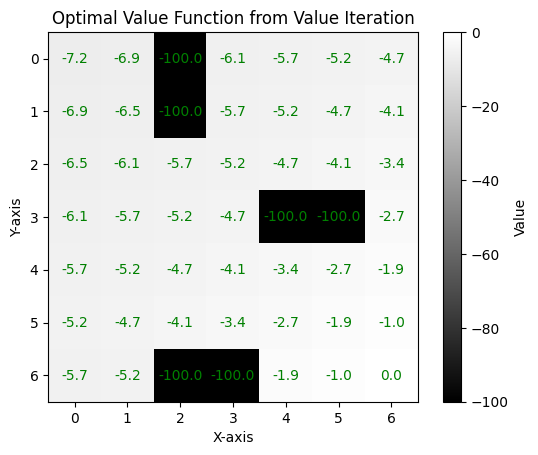

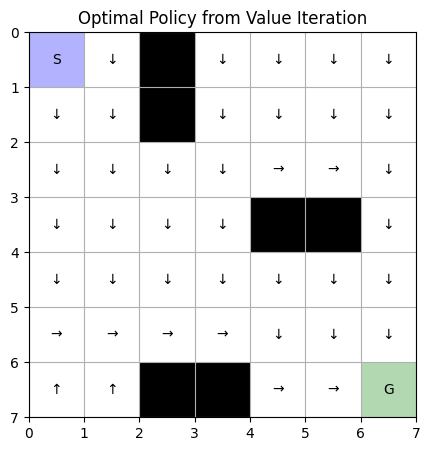

In [77]:
# 반복 가능한 객체 생성
iteration_results = value_iteration(grid_reward)

# 최종 결과만 가져오기
for iteration, V_opt, optimal_policy in iteration_results:
    pass

    # 이후 처리
visualize_map(V_opt, "Optimal Value Function from Value Iteration")
visualize_policy(optimal_policy, start, end, "Optimal Policy from Value Iteration", True)
